<a href="https://colab.research.google.com/github/jobsiggang/school/blob/main/tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **텐서플로우를 이용한 딥러닝**

In [3]:
(a1,a2),(b1,b2)=[([3,4],[30,40]),([6,7],[60,70])]

In [ ]:
print(a1,a2,b1,b2)

In [ ]:
type(a1)

# 데이터셋 준비 => 모델생성 => 학습 => 예측

In [6]:
#tensorflow 와 tf.keras를 임포트
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [7]:
#패션MNIST 데이터는 keras의 데이터셋에 있는 이를 읽어와서 학습용, 테스트 데이터로 구분
fashion_mnist = keras.datasets.fashion_mnist
print(dir(fashion_mnist))
(train_images, train_labels),(test_images, test_labels) =fashion_mnist.load_data()


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'load_data']
4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape # 28*28픽셀크기의 60000 이미지 데이터

In [ ]:
train_labels.shape #60000개의 라벨

In [ ]:
#@title
train_images[0].shape # 이미지 1개의 크기는 28*28픽셀

In [11]:
test_labels.shape

(10000,)

In [12]:
train_labels[:5]  #훈련용 데이텅의 5개의 레이블 확인 (0~9까지 10까지 종류)

array([9, 0, 0, 3, 0], dtype=uint8)

In [ ]:
np.set_printoptions(linewidth=150) 
train_images[0] #이미지는 넘파이 배열에저장 되어있음,한픽셀은 0~255값

In [14]:
class_names=['T-shirts/top','Trowser','Pullover','Dress','Coat','Sandal','Shirt','Sweater','Bag','Ankle boot']
print(train_labels[0])
class_names[train_labels[0]] # 라벨에 대응하는 품목이름 출력

9


'Ankle boot'

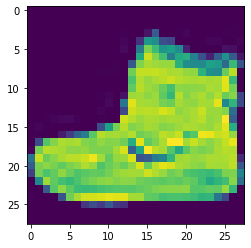

In [15]:
plt.imshow(train_images[0])
plt.show()

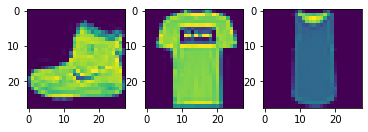

In [16]:
fig=plt.figure()
ax1=fig.add_subplot(1,3,1)  # 1행3열의 1번째위치에 배치
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
ax1.imshow(train_images[0]) #첫 번째 훈련용 데이터
ax2.imshow(train_images[1]) #두 번째 훈련용 데이터
ax3.imshow(train_images[2]) #세 번째 훈련용 데이터
plt.show()

딥러닝  인공 신경망을 구축해 보자

In [17]:
# keras에 있는 Sequetial 모델을 만들어서 Flatten 한줄로 늘어놓고 DEnse층에 넣고 relu라는 비선형함수를 통과해서 나옴
# 입력레이어, 히든 레이어, 출력 레이어로 구성
model= keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),  # Flatten 계층,784(28*28)인 1차원 배열로 바꿔줌, 외부입력을 신경망으로 가져오는 역할
  keras.layers.Dense(128,activation='relu'),  # 히든레이어,노드개수가 128개인 Dense 계층 활성화 relu활성화 함수 사용 계층을 더 추가해보자
  keras.layers.Dense(10,activation='softmax') # 출력레이어, 신경망의 출력을 외부로 전달, Dense 계층  활성화 softmax 활성화 함수 사용
]) #노드개수 10개의 노드 출력값의 합이 1이 되도록 조정 됨,

인공 신경망을 학습시켜보자 : 최적화와 에폭

In [18]:
model.compile(optimizer='adam',                   #adam(adaptive moment estimation)최적화 기법 사용
              loss='sparse_categorical_crossentropy',   #손실함수
              metrics=['accuracy'])

In [19]:
# 훈련 데이터 모음을 가지고 한 번 훈련을 실시하는 것을 에폭(epoch)이라고 부름 , 훈련을 5차례 실시
# 에폭  단계마다 손실값과 정확다 출력됨, 훈련이 진행될수록 손실값은 줄어들고 예측의 정확도는 증가함
model.fit(train_images,train_labels,epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.5628 - accuracy: 0.7158
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6251 - accuracy: 0.7907
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5384 - accuracy: 0.8188
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4987 - accuracy: 0.8306
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4883 - accuracy: 0.8374


In [20]:
#평가
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print("\n 테스트 : ", test_acc)

313/313 - 0s - loss: 0.5186 - accuracy: 0.8368

 테스트 :  0.8367999792098999


학습된 신경망을 새 이미지에 적용해 보자

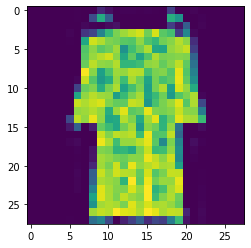

In [35]:
img=test_images[33]
label=test_labels[33]
img.shape #테스트 이미지가 2차원 배열임을 확인함
plt.imshow(test_images[33])

In [36]:
img1=np.around(test_images[33]/255,1)
img1

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.6, 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.1, 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.4, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8, 0.9, 0.7, 0.7, 0.2, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0.9, 0.9, 0.8, 0.8, 0.7, 0.7, 0.8, 0.7, 0.7, 0.8, 0.8, 0.9, 0.8, 0.1, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0.8, 0.7, 0.8, 0.9, 0.5, 0.7, 0.8, 0.9, 0.6, 0.6, 0.8, 0.9, 0.9, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0.8, 0.9, 0.9, 0.8, 0.6, 0.8, 0.6, 0.7, 0.9, 0.8, 0.8, 0.8

In [37]:
img=np.expand_dims(img,axis=0)# 0번째 차원 추가
img.shape

(1, 28, 28)

In [39]:
img

array([[[  0,   0,   0,   0,   0,   0,   1,   0,   0,  27,  10,   0,   2,   2,   1,   2,   1,   0,  47,   0,   0,   3,   0,   0,   0,   0,   0,
           0],
        [  0,   0,   0,   0,   0,   0,   1,   0,  59, 157,  77,   0,   0,   0,   0,   0,   0,   0, 160, 133,   0,   0,   2,   0,   0,   0,   0,
           0],
        [  0,   0,   0,   0,   0,   0,   0,   5,   2,   0,   7,  12,   0,   0,   0,   0,   0,   0,  46,  13,  75,   0,   3,   0,   0,   0,   0,
           0],
        [  0,   0,   0,   0,   0,   3,   0,  39,  52, 114, 171, 204, 218, 229, 239, 200, 240, 190, 179,  46, 118,   5,   0,   0,   0,   0,   0,
           0],
        [  0,   0,   0,   0,   0,   1,   0, 152, 237, 225, 206, 201, 190, 187, 213, 185, 170, 200, 209, 227, 211,  33,   0,   0,   0,   0,   0,
           0],
        [  0,   0,   0,   0,   0,   0,   0, 186, 211, 190, 199, 218, 130, 177, 200, 224, 153, 150, 214, 223, 233,  46,   0,   0,   0,   0,   0,
           0],
        [  0,   0,   0,   0,   0,   0,   0, 19

In [24]:
test_images.shape

(10000, 28, 28)

In [26]:


predic=model.predict(img)
print(predic)
print(np.argmax(predic))
print(class_names[np.argmax(predic)])

[[3.4996620e-03 1.7480196e-02 2.4002756e-03 9.4990981e-01 2.3035295e-02 7.7203261e-12 2.3733389e-03 3.9655382e-18 1.3013757e-03 1.4107646e-21]]
3
Dress


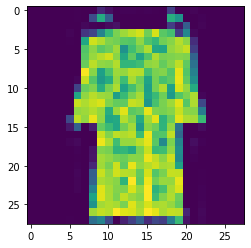

In [27]:
import numpy as np
randIdx=np.random.randint(0,1000) #0에서 1000사이 임의수 발생시켜 테스트 이미지 선택
plt.imshow(test_images[randIdx])

In [28]:
yhat= model.predict(test_images[randIdx][np.newaxis,:,:])
print(yhat)
yhat=np.argmax(yhat) # 10개의 출력 값중 가장 큰 값을 출력
print(yhat)



[[3.4996620e-03 1.7480196e-02 2.4002756e-03 9.4990981e-01 2.3035295e-02 7.7203261e-12 2.3733389e-03 3.9655382e-18 1.3013757e-03 1.4107646e-21]]
3
